<a href="https://colab.research.google.com/github/SebasRl07/matematicas_discretas/blob/main/Pto1_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!apt-get install -y graphviz libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
libgraphviz-dev is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [4]:
def post_order_traversal(tree, node):
    result = []
    for child in sorted(list(tree.successors(node)), key=lambda x: x[1]):  # Visitar hijos
        result.extend(post_order_traversal(tree, child))
    result.append(node[0])  # Visitar la raíz
    return result

# Realizar el recorrido en orden posterior
root = ('-', 1)
post_order_result = post_order_traversal(G, root)


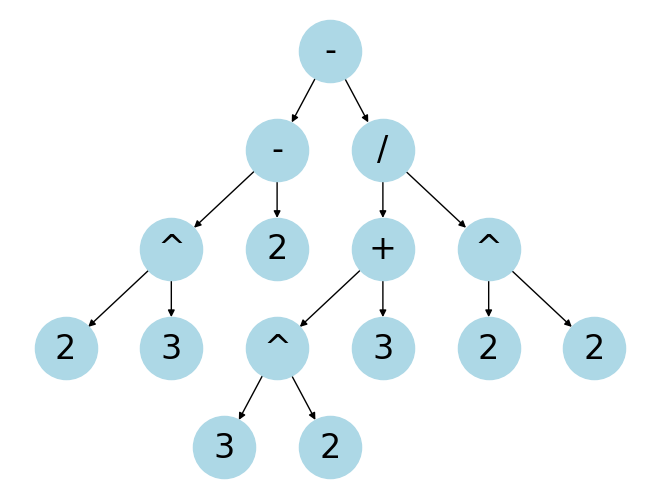

Recorrido en orden posterior: ['2', '3', '^', '2', '-', '3', '2', '^', '3', '+', '2', '2', '^', '/', '-']


In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

def build_tree(pre_order, tree, parent, counter):
    if counter >= len(pre_order):
        return counter

    node = pre_order[counter]
    counter += 1

    unique_node = (node, counter)
    tree.add_node(unique_node, label=node)

    if parent is not None:
        tree.add_edge(parent, unique_node)

    if node in ['-', '/', '+', '×', '^']:
        counter = build_tree(pre_order, tree, unique_node, counter)
        counter = build_tree(pre_order, tree, unique_node, counter)

    return counter

# Lista de nodos y operadores en orden previo
pre_order = ['-', '-', '^', '2', '3', '2', '/', '+', '^', '3', '2', '3', '^', '2', '2']

# Crear un árbol vacío
G = nx.DiGraph()

# Construir el árbol
build_tree(pre_order, G, None, 0)

# Dibujar el árbol
pos = graphviz_layout(G, prog='dot', args='-Grankdir=TB')
labels = {node: node[0] for node in G.nodes()}
nx.draw(G, pos, labels=labels, with_labels=True, node_size=2000, node_color='lightblue', font_size=24)
plt.show()

# Realizar el recorrido en orden posterior
root = ('-', 1)
post_order_result = post_order_traversal(G, root)
print("Recorrido en orden posterior:", post_order_result)
